In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import librosa
from librosa import display
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_actor_all = np.load(path_+"Data_Actor_All_40.npy", allow_pickle=True)
mfccs, label_emotions, label_actors = zip(*data_actor_all)

In [0]:
np.unique(label_actors)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [0]:
label_actors[1437]

1

In [0]:
if label_actors[1437] in range(0,18):
  print('hola')


hola


In [0]:
label_actors_0_19=[]
label_emotions_0_19 = []
mfcc_0_19 = []
label_actors_20_23=[]
label_emotions_20_23 = []
mfcc_20_23 =[]

for i in range(len(label_actors)):
  if label_actors[i] in range(0,20):
    label_actors_0_19.append(label_actors[i])
    label_emotions_0_19.append(label_emotions[i])
    mfcc_0_19.append(mfccs[i])
  elif label_actors[i] in range(20,24):
    label_actors_20_23.append(label_actors[i])
    label_emotions_20_23.append(label_emotions[i])
    mfcc_20_23.append(mfccs[i])

In [0]:
np.unique(label_actors_20_23)

array([20, 21, 22, 23])

In [0]:
emotion_male = []
mfcc_male = []
for i in range (len(label_actors_0_19)):
  if (label_actors_0_19[i] % 2) != 0:
    emotion_male.append(label_emotions_0_19[i])             
    mfcc_male.append(mfcc_0_19[i])



In [0]:
emotion_male_test = []
mfcc_male_test = []
for i in range (len(label_actors_20_23)):
  if (label_actors_20_23[i] % 2) != 0:
    emotion_male_test.append(label_emotions_20_23[i])             
    mfcc_male_test.append(mfcc_20_23[i])

In [0]:
X = np.asarray(mfcc_male)
Y = np.asarray(emotion_male)
Xtr, Xval, Ytr, Yval = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state = 60)
#Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=0.20, shuffle = True, random_state = 60)
Xtst = mfcc_male_test
Ytst = np.asarray(emotion_male_test)

Xtr = np.expand_dims(Xtr, axis=2)
Xtst = np.expand_dims(Xtst, axis=2)
Xval = np.expand_dims(Xval, axis=2)


In [10]:
print(X.shape)
print(Xtr.shape)
print(Ytr.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtst.shape)
print(Ytst.shape)

(600, 40)
(480, 40, 1)
(480,)
(120, 40, 1)
(120,)
(120, 40, 1)
(120,)


In [11]:
model = models.Sequential()
model.add(layers.Conv1D(128, 8,padding='same',
                 input_shape=(Xtr.shape[1],1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Conv1D(256, 8,padding='same',))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           1152      
_________________________________________________________________
activation (Activation)      (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 256)            262400    
_________________________________________________________________
activation_1 (Activation)    (None, 8, 256)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.00003), metrics=['accuracy'])
cnnhistory=model.fit(Xtr, Ytr, batch_size=16, epochs=500, validation_data=(Xval, Yval)) 

Epoch 1/500
30/30 [==============================] - 1s 29ms/step - loss: 5.9778 - accuracy: 0.1646 - val_loss: 2.2068 - val_accuracy: 0.1917
Epoch 2/500
30/30 [==============================] - 1s 22ms/step - loss: 4.0246 - accuracy: 0.1354 - val_loss: 2.1294 - val_accuracy: 0.1417
Epoch 3/500
30/30 [==============================] - 1s 22ms/step - loss: 3.3609 - accuracy: 0.1333 - val_loss: 2.1378 - val_accuracy: 0.2333
Epoch 4/500
30/30 [==============================] - 1s 22ms/step - loss: 2.7498 - accuracy: 0.1542 - val_loss: 1.9683 - val_accuracy: 0.1833
Epoch 5/500
30/30 [==============================] - 1s 22ms/step - loss: 2.4583 - accuracy: 0.2000 - val_loss: 2.1482 - val_accuracy: 0.1083
Epoch 6/500
30/30 [==============================] - 1s 22ms/step - loss: 2.1797 - accuracy: 0.2021 - val_loss: 1.8560 - val_accuracy: 0.3333
Epoch 7/500
30/30 [==============================] - 1s 22ms/step - loss: 2.1035 - accuracy: 0.2375 - val_loss: 1.8602 - val_accuracy: 0.2667
Epoch 

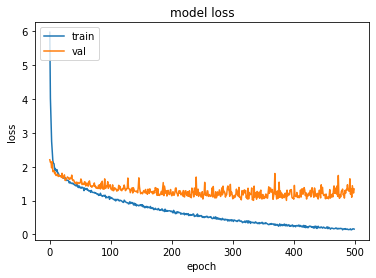

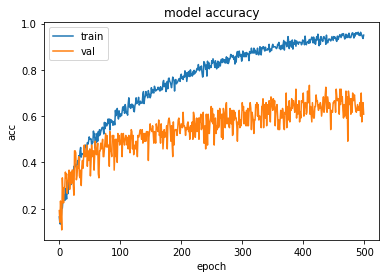

In [13]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(Xtst, Ytst, verbose=2)

4/4 - 0s - loss: 2.3617 - accuracy: 0.5000


In [15]:
predictions = model.predict_classes(Xtst)
arrayyy=confusion_matrix(Ytst, predictions)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


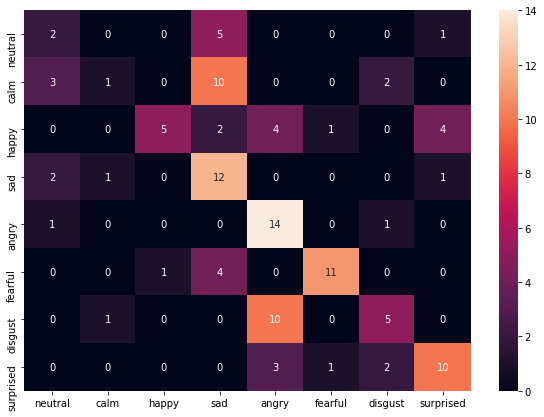

In [16]:
# Plot non-normalized confusion matrix
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix

class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

df_cm = pd.DataFrame(arrayyy, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)